In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import os
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [9]:
import zipfile
import os


with zipfile.ZipFile('/content/cremad.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/CREMA-D')

print('CREMA-D Dataset is extracted')
paths = []
labels = []

for dirpath, _, filenames in os.walk('/content/CREMA-D/cremad/AudioWAV'):
    for fileName in filenames:
        if fileName.endswith('.wav'):
            paths.append(os.path.join(dirpath, fileName))
            label = fileName.split('_')[2]
            labels.append(label.lower())

print('CREMA-D Dataset is Loaded')
print(f'Total files: {len(paths)}')
print(f'Example path: {paths[0]}')
print(f'Example label: {labels[0]}')


CREMA-D Dataset is extracted
CREMA-D Dataset is Loaded
Total files: 7442
Example path: /content/CREMA-D/cremad/AudioWAV/1067_ITS_SAD_XX.wav
Example label: sad


In [17]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/CREMA-D/cremad/AudioWAV/1051_ITH_ANG_...,ang
1,/content/CREMA-D/cremad/AudioWAV/1072_IOM_HAP_...,hap
2,/content/CREMA-D/cremad/AudioWAV/1084_IEO_HAP_...,hap
3,/content/CREMA-D/cremad/AudioWAV/1050_ITS_FEA_...,fea
4,/content/CREMA-D/cremad/AudioWAV/1054_IOM_FEA_...,fea


In [18]:
df['label'].value_counts()

,count
label,
ang,1271
hap,1271
fea,1271
dis,1271
sad,1271
neu,1087


In [24]:
import pandas as pd
import speech_recognition as sr

recognizer = sr.Recognizer()
count = 0

def audio_to_text(audio_path):
    global count
    try:
        with sr.AudioFile(audio_path) as source:
            audio_data = recognizer.record(source)
            text = recognizer.recognize_google(audio_data)
            count += 1
            print(f"Processed file count: {count}")
            return text
    except Exception as e:
        print(f"Error processing {audio_path}: {e}")
        return None


df['text'] = df['speech'].apply(audio_to_text)

print(df)


Streaming output truncated to the last 5000 lines.
Processed file count: 2275
Processed file count: 2276
Processed file count: 2277
Processed file count: 2278
Processed file count: 2279
Processed file count: 2280
Processed file count: 2281
Processed file count: 2282
Processed file count: 2283
Processed file count: 2284
Processed file count: 2285
Processed file count: 2286
Processed file count: 2287
Processed file count: 2288
Error processing /content/CREMA-D/cremad/AudioWAV/1001_TAI_FEA_XX.wav: 
Processed file count: 2289
Error processing /content/CREMA-D/cremad/AudioWAV/1088_IEO_SAD_HI.wav: 
Processed file count: 2290
Processed file count: 2291
Error processing /content/CREMA-D/cremad/AudioWAV/1068_ITS_SAD_XX.wav: 
Processed file count: 2292
Processed file count: 2293
Processed file count: 2294
Processed file count: 2295
Error processing /content/CREMA-D/cremad/AudioWAV/1054_TAI_DIS_XX.wav: 
Processed file count: 2296
Processed file count: 2297
Processed file count: 2298
Processed fil

In [6]:
df.shape

(6893, 3)

In [5]:
df.dropna(inplace=True)


In [37]:
#can start from here

In [4]:
df = pd.read_csv('/content/data.csv')

In [19]:
from sentence_transformers import SentenceTransformer

model_name = "sentence-transformers/all-MiniLM-L6-v2"
sentence_model = SentenceTransformer(model_name)

def get_sentence_embeddings(text):
    embeddings = sentence_model.encode(text)
    return embeddings

text_features = np.array([get_sentence_embeddings(text) for text in df['text']])


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
import librosa
import numpy as np

def extract_audio_features(file_name):
    y, sr = librosa.load(file_name, duration=5, offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfccs

audio_features = np.array([extract_audio_features(path) for path in df['speech']])


In [16]:
audio_features.shape

(6893, 40)

In [20]:
text_features.shape

(6893, 384)

In [22]:
import pandas as pd
import numpy as np


combined_features = np.hstack([text_features, audio_features])

combined_df = pd.DataFrame(combined_features)

print(combined_df.shape)


(6893, 424)


,count
label,
ang,1248
hap,1183
dis,1147
sad,1128
fea,1124
neu,1063


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                     │ (None, 512)                 │         217,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 390,470 (1.49 MB)

 Trainable params: 390,470 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.1614 - loss: 3.2858 - val_accuracy: 0.2002 - val_loss: 2.8301
Epoch 2/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1744 - loss: 2.9430 - val_accuracy: 0.2195 - val_loss: 2.8138
Epoch 3/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1817 - loss: 2.8625 - val_accuracy: 0.2389 - val_loss: 2.7943
Epoch 4/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1880 - loss: 2.8392 - val_accuracy: 0.2621 - val_loss: 2.7700
Epoch 5/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2054 - loss: 2.7929 - val_accuracy: 0.2650 - val_loss: 2.7391
Epoch 6/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2320 - loss: 2.7470 - val_accuracy: 0.3129 - val_loss: 2.6901
Epoch 7/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2446 - loss: 2.7061 - val_accuracy: 0.3298 - val_loss: 2.6313
Epoch 8/300
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2744 - loss: 2.6526 - val_accuracy: 0.3288 -

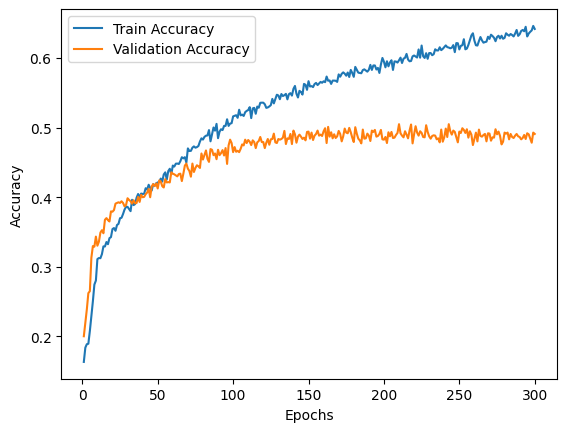

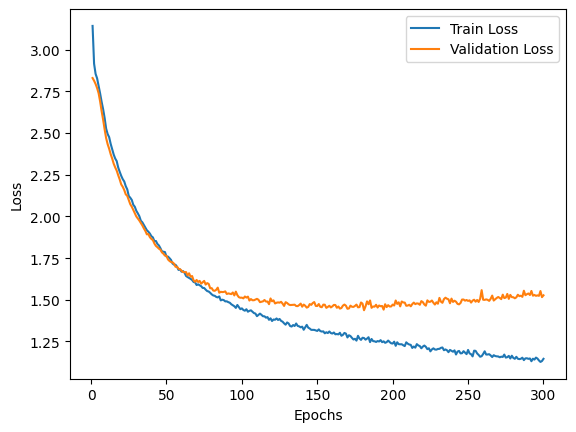

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
X = combined_features
y = pd.get_dummies(df['label']).values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer=RMSprop(learning_rate=0.0003), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=300,
    batch_size=128,
    shuffle=True,
    verbose=True,
)

epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], label='Train Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, history.history['loss'], label='Train Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# New section